In [1]:
%load_ext autoreload
%autoreload 2

import os
from datetime import datetime
from time import time
# import dill
import pickle
import glob
import importlib
import numpy as np
import scipy as sp
import scipy.misc
import pandas as pd
import re
import itertools
from scanf import scanf
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import colors as mcolors
from matplotlib.colors import ListedColormap, BoundaryNorm, PowerNorm, Normalize
from mpl_toolkits.mplot3d import axes3d, Axes3D
from scipy.optimize import leastsq, curve_fit
from scipy import interpolate, integrate, optimize, sparse
from scipy.interpolate import interp1d, interp2d
from IPython.display import display, HTML, Math
from scipy import interpolate
from tqdm.notebook import tqdm as tqdm_notebook

# from act_act_src import baseClass
from act_src import particleClass
from act_src import interactionClass
from act_src import problemClass
from act_src import relationClass
from JicodeStore.support_class import *
from JicodeStore import support_fun as spf
from act_codeStore import support_fun_calculate as spc

PWD = os.getcwd()
np.set_printoptions(linewidth=110, precision=5)

params = {'animation.html': 'html5',
          'font.family':    'sans-serif',
          'font.size':      15, }
preamble = r' '
preamble = preamble + '\\usepackage{bm} '
preamble = preamble + '\\usepackage{amsmath} '
preamble = preamble + '\\usepackage{amssymb} '
preamble = preamble + '\\usepackage{mathrsfs} '
preamble = preamble + '\\DeclareMathOperator{\\Tr}{Tr} '
params['text.latex.preamble'] = preamble
params['text.usetex'] = True
plt.rcParams.update(params)

In [2]:
from JicodeStore.support_class import *
from JicodeStore import support_fun as spf
from act_codeStore import support_fun_calculate as spc
from act_codeStore import support_fun_show as sps
from collectiveFish.do_calculate import *

## compare with ir_sim, car case. 

In [3]:
# update_fun, update_order, eval_dt = '1fe', (0, 0), 0.1
# nptc, max_t, calculate_fun = 1, eval_dt * 1e4, 'do_ackermann'
# l_steer, w_steer = 3, 0

# problem_kwargs = {
#     'ini_t':            np.float64(0),
#     'max_t':            max_t,
#     'update_fun':       '1fe',
#     'update_order':     (0, 0),
#     'eval_dt':          eval_dt,
#     'calculate_fun':    calculate_fun_dict[calculate_fun],
#     'prbHandle':        prbHandle_dict[calculate_fun],
#     'rltHandle':        rltHandle_dict[calculate_fun],
#     'ptcHandle':        ptcHandle_dict[calculate_fun],
#     'fileHandle':       'try_ackermann',
#     'save_every':       np.int64(1),
#     'nptc':             np.int64(nptc),
#     'overlap_epsilon':  np.float64(1e-100),
#     'un':               np.float64(0.02) / 0.024,
#     'ln':               np.float64(-1),
#     'Xlim':             np.float64(6),
#     'attract':          np.float64(0.41),
#     'align':            np.float64(2.7),
#     'l_steer':          np.float64(l_steer),
#     'w_steer':          np.float64(w_steer),
#     'radian_tolerance': 0.,
#     'viewRange':        np.float64(1),
#     'seed':             1,
#     'tqdm_fun':         tqdm_notebook,
# }

# doPrb1 = problem_kwargs['calculate_fun'](**problem_kwargs)
# prb1 = doPrb1.ini_calculate()
# obji = prb1.obj_list[0]
# obji.X = np.array((10, 10))
# obji.phi = np.float64(0)
# obji.phi_steer = np.float64(0)
# obji.goal = np.array((10, 20, 3.1415926))
# obji.goal_threshold = 0.2
# obji.v_max = np.float64(5)
# obji.w_max = np.float64(2)
# obji.phi_steer_limit = np.pi / 4
# prb1.update_self(t0=problem_kwargs['ini_t'], t1=problem_kwargs['max_t'], eval_dt=eval_dt, )

# # print(prb1.t_hist.shape)

# ################################################################################3

# # %matplotlib notebook
# %matplotlib inline

# figsize=np.array((9, 9))*0.5
# dpi = 500 if 'inline' in matplotlib.get_backend() else 100
# plt_tmin = -1
# nmarker = 0.1

# fig, axi = plt.subplots(1, 1, figsize=figsize, dpi=dpi, constrained_layout=True)
# fig.patch.set_facecolor('white')
# cmap = plt.get_cmap('viridis')
# for obji in prb1.obj_list:
#     color = cmap(obji.index / prb1.n_obj)
#     tidx = prb1.t_hist >= plt_tmin
#     X_hist = obji.X_hist[tidx]
#     axi.scatter(X_hist[0, 0], X_hist[0, 1], color=color, marker='s')
#     axi.plot(X_hist[:, 0], X_hist[:, 1], '.-', color=color, markevery=nmarker)
# sps.set_axes_equal(axi)


## ackermann car, align_attract interaction

In [4]:
# # first case, do_behaviorParticle2D, as a banchmark at small l_steer limit. 
# update_fun, update_order, eval_dt = '1fe', (0, 0), 0.01
# nptc, max_t, calculate_fun = 3, eval_dt * 1e4, 'do_behaviorParticle2D'

# problem_kwargs = {
#     'ini_t':           np.float64(0),
#     'max_t':           max_t,
#     'update_fun':      '1fe',
#     'update_order':    (0, 0),
#     'eval_dt':         eval_dt,
#     'calculate_fun':   calculate_fun_dict[calculate_fun],
#     'prbHandle':       prbHandle_dict[calculate_fun],
#     'rltHandle':       rltHandle_dict[calculate_fun],
#     'ptcHandle':       ptcHandle_dict[calculate_fun],
#     'fileHandle':      'try_Behavior2DProblem',
#     'save_every':      np.int64(1),
#     'nptc':            np.int64(nptc),
#     'overlap_epsilon': np.float64(1e-100),
#     'un':              np.float64(1),
#     'ln':              np.float64(-1),
#     'Xlim':            np.float64(6),
#     'attract':         np.float64(0),
#     'align':           np.float64(1),
#     'viewRange':       np.float64(1),
#     'seed':            1,
#     'tqdm_fun':        tqdm_notebook,
# }
# behaviorParticle2D_kwargs = problem_kwargs

# doPrb1 = problem_kwargs['calculate_fun'](**problem_kwargs)
# prb1 = doPrb1.do_calculate(ini_t=problem_kwargs['ini_t'], max_t=max_t, eval_dt=eval_dt, )

# ################################################################################3

# # %matplotlib notebook
# %matplotlib inline

# figsize=np.array((9, 9))*0.5
# dpi = 500 if 'inline' in matplotlib.get_backend() else 100
# plt_tmin = -1
# nmarker = 0.1

# fig, axi = plt.subplots(1, 1, figsize=figsize, dpi=dpi, constrained_layout=True)
# fig.patch.set_facecolor('white')
# cmap = plt.get_cmap('viridis')
# for obji in prb1.obj_list:
#     color = cmap(obji.index / prb1.n_obj)
#     tidx = prb1.t_hist >= plt_tmin
#     X_hist = obji.X_hist[tidx]
#     axi.scatter(X_hist[0, 0], X_hist[0, 1], color=color, marker='s')
#     axi.plot(X_hist[:, 0], X_hist[:, 1], '.-', color=color, markevery=nmarker)
# sps.set_axes_equal(axi)


In [5]:
# update_fun, update_order, eval_dt = '1fe', (0, 0), 0.1
# nptc, max_t, calculate_fun = 10, eval_dt * 1e4, 'do_ackermann_alignAttract'
# l_steer, w_steer = 1, 0

# new_kwargs = {
#     'calculate_fun':    calculate_fun_dict[calculate_fun],
#     'prbHandle':        prbHandle_dict[calculate_fun],
#     'rltHandle':        rltHandle_dict[calculate_fun],
#     'ptcHandle':        ptcHandle_dict[calculate_fun],
#     'fileHandle':       'do_ackermann_alignAttract',
#     'l_steer':          np.float64(l_steer),
#     'w_steer':          np.float64(w_steer),
#     # 
#     'ini_t':           np.float64(0),
#     'max_t':           max_t,
#     'update_fun':      '1fe',
#     'update_order':    (0, 0),
#     'eval_dt':         eval_dt,
#     'calculate_fun':   calculate_fun_dict[calculate_fun],
#     'prbHandle':       prbHandle_dict[calculate_fun],
#     'rltHandle':       rltHandle_dict[calculate_fun],
#     'ptcHandle':       ptcHandle_dict[calculate_fun],
#     'fileHandle':      'try_Behavior2DProblem',
#     'save_every':      np.int64(1),
#     'nptc':            np.int64(nptc),
#     'overlap_epsilon': np.float64(0),
#     'un':              np.float64(1),
#     'ln':              np.float64(-1),
#     'Xlim':            np.float64(6),
#     'attract':         np.float64(0.0001),
#     'align':           np.float64(0.0),
#     'viewRange':       np.float64(1),
#     'seed':            1,
#     'tqdm_fun':        tqdm_notebook,
# }
# # problem_kwargs = behaviorParticle2D_kwargs.copy()
# problem_kwargs.update(new_kwargs)
# # print(problem_kwargs)

# doPrb1 = problem_kwargs['calculate_fun'](**problem_kwargs)
# prb1 = doPrb1.ini_calculate( )
# # obji = prb1.obj_list[0]
# # obji.X = np.array((10, 10))
# # obji.phi = np.float64(0)
# # obji.phi_steer = np.float64(0)
# # obji.goal = np.array((10, 20, 3.1415926))
# # obji.goal_threshold = 0.2
# # obji.v_max = np.float64(5)
# # obji.w_max = np.float64(2)
# # obji.phi_steer_limit = np.pi / 4 
# prb1.update_self(t0=problem_kwargs['ini_t'], t1=problem_kwargs['max_t'], 
#                  eval_dt=eval_dt, )

# # print(prb1.t_hist.shape)

# ################################################################################3

# # %matplotlib notebook
# %matplotlib inline

# figsize=np.array((9, 9))*0.5
# dpi = 500 if 'inline' in matplotlib.get_backend() else 100
# plt_tmin = -1
# nmarker = 0.1

# fig, axi = plt.subplots(1, 1, figsize=figsize, dpi=dpi, constrained_layout=True)
# fig.patch.set_facecolor('white')
# cmap = plt.get_cmap('viridis')
# for obji in prb1.obj_list:
#     color = cmap(obji.index / prb1.n_obj)
#     tidx = prb1.t_hist >= plt_tmin
#     X_hist = obji.X_hist[tidx]
#     axi.scatter(X_hist[0, 0], X_hist[0, 1], color=color, marker='s')
#     axi.plot(X_hist[:, 0], X_hist[:, 1], '.-', color=color, markevery=nmarker)
# sps.set_axes_equal(axi)


## ackermann car, phaseLag2D interaction

remove folder try_phaseLag2D
make folder try_phaseLag2D
 
Collective motion solve, Zhang Ji, 2021. 
########################################################################
Generate Problem. 
  All the particles have a unified speed=1.000000, 
  All the particles have a unified length=-1.000000, 
  All the particles have a unified spin=0.000000, 
  Generate 2 particles with random seed 1
  Generate method: random_sample. 


  try_phaseLag2D:   0%|          | 0/100 [00:00<?, ?it/s]

 
Information about try_phaseLag2D (behavior2DProblem): 
  This is a 2 dimensional problem, contain 2 objects. 
  update function: 1fe, update order: (0, 0), max loop: 1000000000
  t0=0.000000, t1=1000.000000, dt=1.000000
  save log file to try_phaseLag2D/log.try_phaseLag2D 
  save pickle file to try_phaseLag2D/pickle.try_phaseLag2D 
  rotational noise: 0.000000, translational noise: 0.000000
  align: 0.100000, attract: 0.000000, viewRange: 1.000000, 
 
Information about selfPropelled2D (selfPropelled2D): 
  None
 
Information about phaseLag2D (phaseLag2D): 
  phaseLag=0.000000
 
Information about Relation2D (localBaseRelation2D): 
  overlap_epsilon=0.000000e+00
  localRange=1.000000e+10
 
Solve, finish time: 2023-10-13 17:17:22
Solve, usage time: 0:00:00.200891
 


(<Figure size 960x540 with 2 Axes>, True)

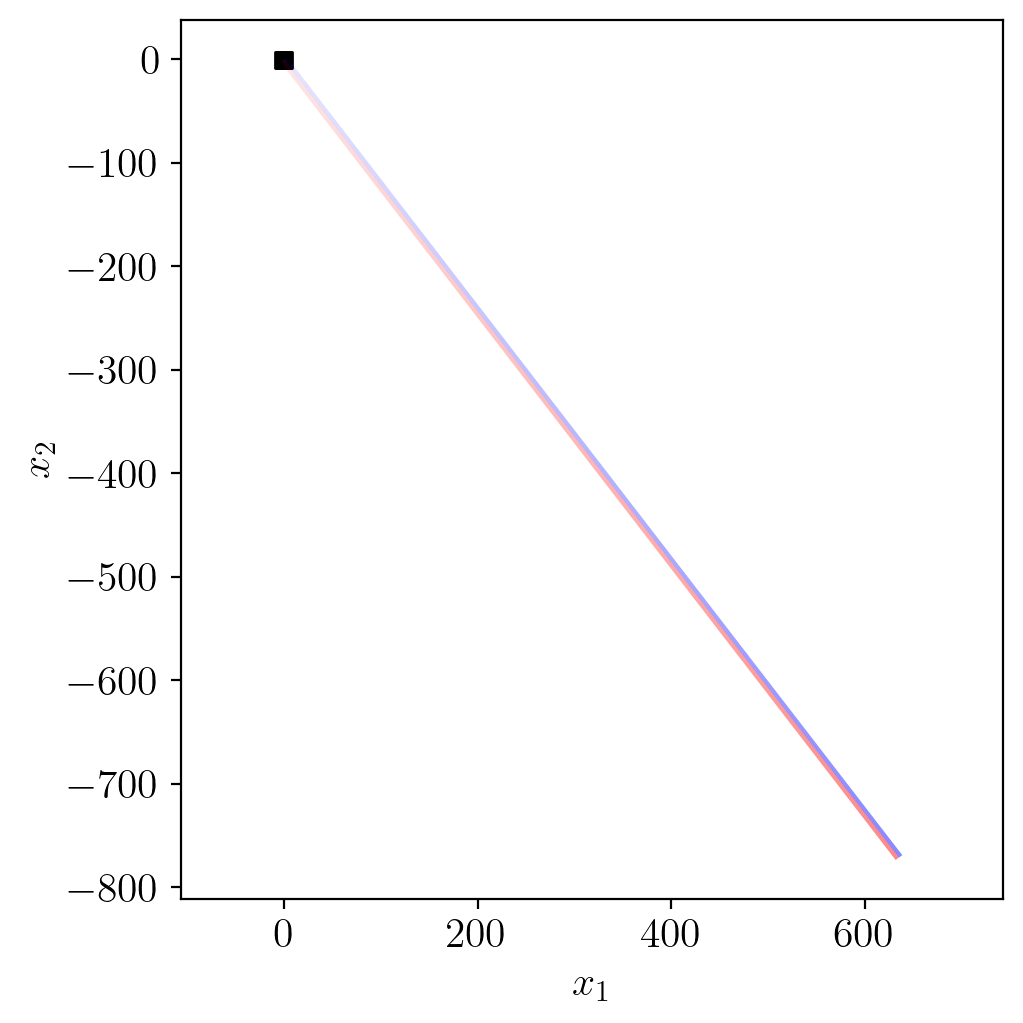

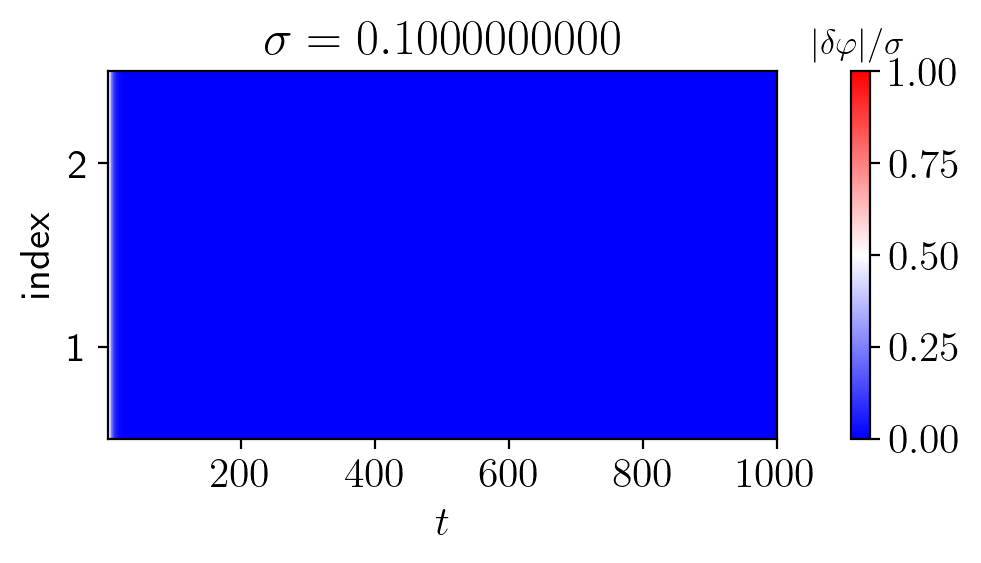

remove folder try_Behavior2DProblem
make folder try_Behavior2DProblem
 
Collective motion solve, Zhang Ji, 2021. 
########################################################################
Generate Problem. 
  All the particles have a unified speed=1.000000, 
  All the particles have a unified length=-1.000000, 
  All the particles have a unified l_steer=1.000000, 
  All the particles have a unified w_steer=0.000000, 
  All the particles have a unified spin=0.000000, 
  Generate 3 particles with random seed 1
  Generate method: random_sample. 
 
Information about try_Behavior2DProblem (Ackermann2DProblem): 
  This is a 2 dimensional problem, contain 3 objects. 
  update function: 5bs, update order: (1e-09, 1e-12), max loop: 1000000000
  t0=0.000000, t1=100.000000, dt=1.000000
  save log file to try_Behavior2DProblem/log.try_Behavior2DProblem 
  save pickle file to try_Behavior2DProblem/pickle.try_Behavior2DProblem 
  rotational noise: 0.000000, translational noise: 0.000000
  align: 0.01

[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 50
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 5
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 32
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 213
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 50
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 5
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 32
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 213
[ji4090-20:1

[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 213
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 50
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 5
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 32
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 213
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 50
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 5
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 32
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1

[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 213
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 50
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 5
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 32
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 213
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 50
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 5
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 32
[ji4090-20:1

[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 32
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 213
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 50
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 5
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 32
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 213
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 50
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 5
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1

[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 32
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 213
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 50
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 5
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 32
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 213
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 50
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 5
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1

[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 32
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 213
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 50
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 5
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 32
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 213
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 50
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 5
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1

[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 32
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 213
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 50
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 5
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 32
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 213
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 50
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 5
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1

[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 32
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 213
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 50
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 5
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 32
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 213
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 50
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 5
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1

[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 32
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 213
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 50
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 5
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 32
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 213
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 50
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 5
[ji4090-20:1118659] tcp_peer_recv_connect_ack: invalid header type: 0
[ji4090-20:1

In [6]:
# update_fun, update_order, eval_dt = '5f', (1e-6, 1e-9), 1
update_fun, update_order, eval_dt = '1fe', (0, 0), 1
nptc, calculate_fun = 2, 'do_phaseLag2D'
ini_t, max_t, Xlim = np.float64(0), eval_dt * 1e3, 1
seed = 1
align, phaseLag2D = 0.1, 0 * np.pi

problem_kwargs = {
    'ini_t':           ini_t,
    'max_t':           max_t,
    'update_fun':      update_fun,
    'update_order':    update_order,
    'eval_dt':         eval_dt,
    'calculate_fun':   calculate_fun_dict[calculate_fun],
    'prbHandle':       prbHandle_dict[calculate_fun],
    'rltHandle':       rltHandle_dict[calculate_fun],
    'ptcHandle':       ptcHandle_dict[calculate_fun],
    'fileHandle':      'try_phaseLag2D',
    'save_every':      np.int64(1),
    'nptc':            np.int64(nptc),
    'overlap_epsilon': np.float64(0),
    'un':              np.float64(1),
    'ln':              np.float64(-1),
    'Xlim':            np.float64(Xlim),
    'Xrange':          np.float64(Xlim),
    'attract':         np.float64(0),
    'align':           np.float64(align),
    'viewRange':       np.float64(1),
    'localRange':      np.float64(1e10),
    'phaseLag2D':      np.float64(phaseLag2D),
    'LJ_A':            np.float64(0),
    'LJ_B':            np.float64(0),
    'LJ_a':            np.float64(0),
    'LJ_b':            np.float64(0),
    'seed':            seed,
    'tqdm_fun':        tqdm_notebook,
}
phaseLag2D_kwargs = problem_kwargs

doPrb1 = problem_kwargs['calculate_fun'](**problem_kwargs)
prb1 = doPrb1.do_calculate(ini_t=ini_t, max_t=max_t, eval_dt=eval_dt, )
# do_hdf5(prb1, **problem_kwargs)
# prb1.hdf5_load(showInfo=False)

################################################################################3

# %matplotlib notebook
%matplotlib inline

figsize = np.array((16, 9)) * 0.3
dpi = 200 if 'inline' in matplotlib.get_backend() else 100
plt_tmin = -1
markevery = 0.1
# 
resampling_fct, interp1d_kind = None, 'linear'
sps.show_fig_fun(prb1, sps.core_trajectory2D, figsize=None, dpi=dpi, 
                 plt_tmin=plt_tmin, resampling_fct=resampling_fct)
#
resampling_fct, interp1d_kind = 1, 'linear'
sps.show_fig_fun(prb1, sps.core_avrPhaseVelocity, figsize=figsize, dpi=dpi, 
                 plt_tmin=plt_tmin, resampling_fct=resampling_fct, 
                 tavr=0.1)

  try_Behavior2DProblem:   0%|          | 0/100 [00:00<?, ?it/s]

(<Figure size 960x540 with 2 Axes>, True)

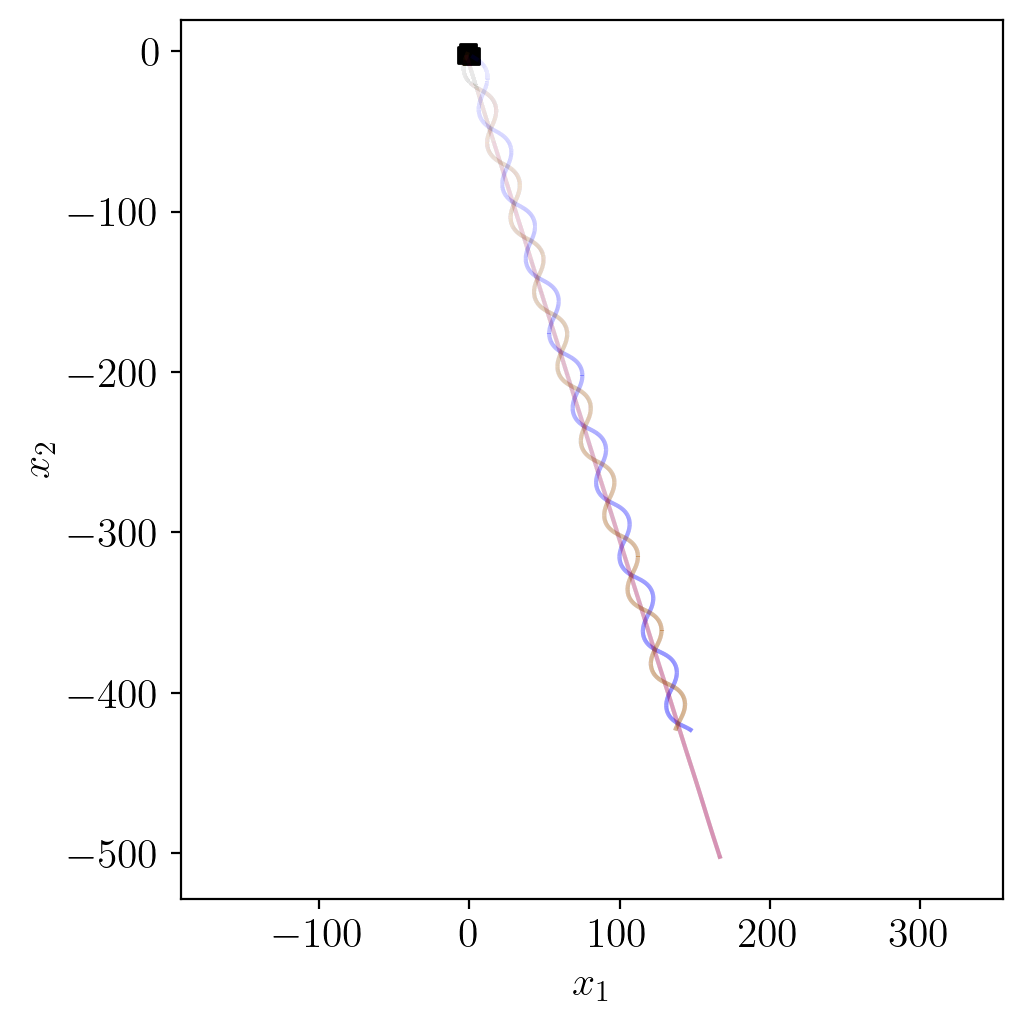

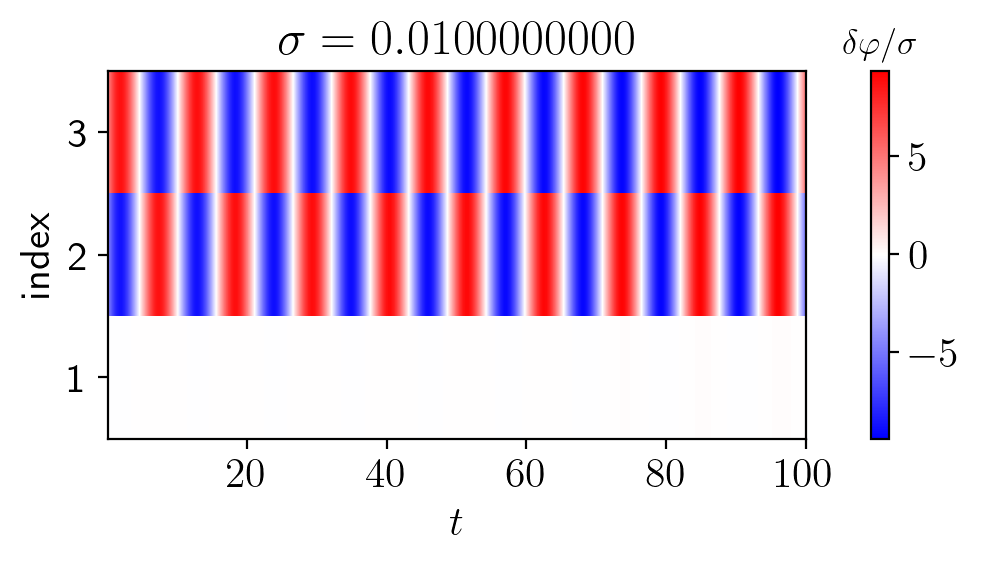

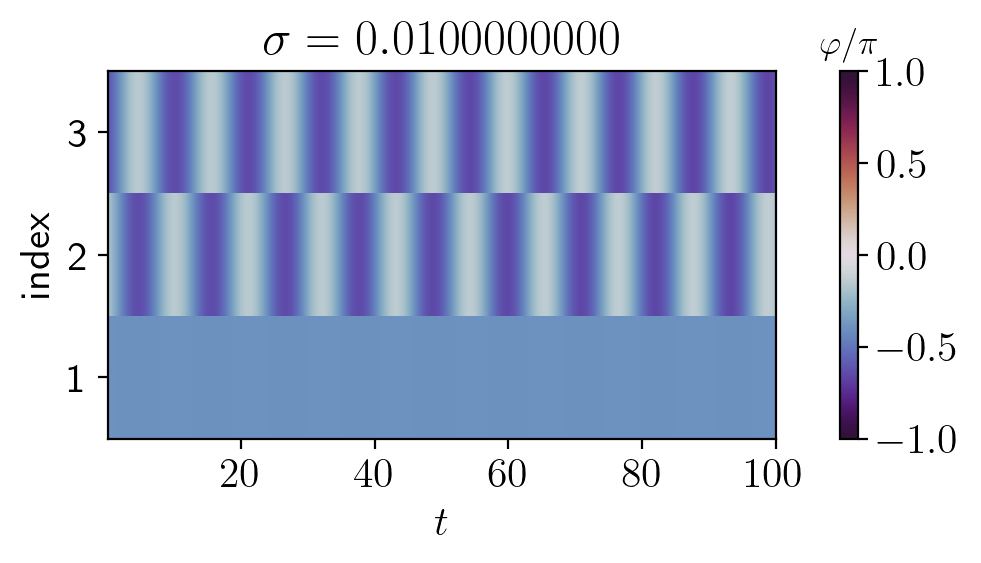

In [7]:
# update_fun, update_order, eval_dt = '1fe', (0, 0), 1
# update_fun, update_order, eval_dt = '8vr', (1e-3, 1e-6), 1
update_fun, update_order, eval_dt = '5bs', (1e-9, 1e-12), 1
nptc, max_t, calculate_fun = 3, eval_dt * 1e2, 'do_ackermann_phaseLag2D'
l_steer, w_steer = 1, 0
align, phaseLag2D, seed = 0.01, 0, 1

new_kwargs = {
    'calculate_fun':    calculate_fun_dict[calculate_fun],
    'prbHandle':        prbHandle_dict[calculate_fun],
    'rltHandle':        rltHandle_dict[calculate_fun],
    'ptcHandle':        ptcHandle_dict[calculate_fun],
    'fileHandle':       'do_ackermann_phaseLag2D',
    'l_steer':          np.float64(l_steer),
    'w_steer':          np.float64(w_steer),
    # 
    'ini_t':           np.float64(0),
    'max_t':           max_t,
    'update_fun':      update_fun,
    'update_order':    update_order,
    'eval_dt':         eval_dt,
    'calculate_fun':   calculate_fun_dict[calculate_fun],
    'prbHandle':       prbHandle_dict[calculate_fun],
    'rltHandle':       rltHandle_dict[calculate_fun],
    'ptcHandle':       ptcHandle_dict[calculate_fun],
    'fileHandle':      'try_Behavior2DProblem',
    'save_every':      np.int64(1),
    'nptc':            np.int64(nptc),
    'overlap_epsilon': np.float64(0),
    'phaseLag2D':      np.float64(phaseLag2D),
    'un':              np.float64(1),
    'ln':              np.float64(-1),
    'Xlim':            np.float64(6),
    'attract':         np.float64(0.000),
    'align':           np.float64(align),
    'viewRange':       np.float64(1),
    'seed':            seed,
    'tqdm_fun':        tqdm_notebook,
}
problem_kwargs = phaseLag2D_kwargs.copy()
problem_kwargs.update(new_kwargs)
# print(problem_kwargs)

doPrb1 = problem_kwargs['calculate_fun'](**problem_kwargs)
prb1 = doPrb1.ini_calculate( )
# obji = prb1.obj_list[0]
# obji.X = np.array((10, 10))
# obji.phi = np.float64(0)
# obji.phi_steer = np.float64(0)
# obji.goal = np.array((10, 20, 3.1415926))
# obji.goal_threshold = 0.2
# obji.v_max = np.float64(5)
# obji.w_max = np.float64(2)
# obji.phi_steer_limit = np.pi / 4 
prb1.update_self(t0=problem_kwargs['ini_t'], t1=problem_kwargs['max_t'], 
                 eval_dt=eval_dt, )

# print(prb1.t_hist.shape)

################################################################################3

# %matplotlib notebook
%matplotlib inline

figsize = np.array((16, 9)) * 0.3
dpi = 200 if 'inline' in matplotlib.get_backend() else 100
plt_tmin = prb1.t_hist.max() - 1000
markevery = 0.1
# 
resampling_fct, interp1d_kind = None, 'linear'
sps.show_fig_fun(prb1, sps.core_trajectory2D, figsize=None, dpi=dpi, 
                 plt_tmin=plt_tmin, resampling_fct=resampling_fct)
#
resampling_fct, interp1d_kind = 1, 'linear'
sps.show_fig_fun(prb1, sps.core_avrPhaseVelocity, figsize=figsize, dpi=dpi, 
                 plt_tmin=plt_tmin, resampling_fct=resampling_fct, npabs=False, 
                 tavr=None, vmin=None, vmax=None)

cmap = plt.get_cmap('twilight_shifted')
sps.show_fig_fun(prb1, sps.core_avrPhase, figsize=figsize, dpi=dpi, 
                 plt_tmin=plt_tmin, resampling_fct=resampling_fct, cmap=cmap, 
                 tavr=None, sort_type='normal')

In [9]:
# update_fun, update_order, eval_dt = '1fe', (0, 0), 1
# update_fun, update_order, eval_dt = '8vr', (1e-3, 1e-6), 1
update_fun, update_order, eval_dt = '5bs', (1e-9, 1e-12), 1
nptc, max_t, calculate_fun = 3, eval_dt * 1e2, 'do_ackermann_phaseLag2D'
l_steer, w_steer = 1, 0
align, phaseLag2D, seed = 0.01, 0, 1

new_kwargs = {
    'calculate_fun':    calculate_fun_dict[calculate_fun],
    'prbHandle':        prbHandle_dict[calculate_fun],
    'rltHandle':        rltHandle_dict[calculate_fun],
    'ptcHandle':        ptcHandle_dict[calculate_fun],
    'fileHandle':       'do_ackermann_phaseLag2D',
    'l_steer':          np.float64(l_steer),
    'w_steer':          np.float64(w_steer),
    # 
    'ini_t':           np.float64(0),
    'max_t':           max_t,
    'update_fun':      update_fun,
    'update_order':    update_order,
    'eval_dt':         eval_dt,
    'calculate_fun':   calculate_fun_dict[calculate_fun],
    'prbHandle':       prbHandle_dict[calculate_fun],
    'rltHandle':       rltHandle_dict[calculate_fun],
    'ptcHandle':       ptcHandle_dict[calculate_fun],
    'fileHandle':      'try_Behavior2DProblem',
    'save_every':      np.int64(1),
    'nptc':            np.int64(nptc),
    'overlap_epsilon': np.float64(0),
    'phaseLag2D':      np.float64(phaseLag2D),
    'un':              np.float64(1),
    'ln':              np.float64(-1),
    'Xlim':            np.float64(6),
    'attract':         np.float64(0.000),
    'align':           np.float64(align),
    'viewRange':       np.float64(1),
    'seed':            seed,
    'tqdm_fun':        tqdm_notebook,
}
problem_kwargs = phaseLag2D_kwargs.copy()
problem_kwargs.update(new_kwargs)
# print(problem_kwargs)

doPrb1 = problem_kwargs['calculate_fun'](**problem_kwargs)
prb1 = doPrb1.ini_calculate( )
prb1.update_self_prepare(t0=problem_kwargs['ini_t'], t1=problem_kwargs['max_t'], 
                         eval_dt=eval_dt, )
for t1 in np.linspace(problem_kwargs['ini_t'], problem_kwargs['max_t'], 10)[1:]: 
    prb1.update_self_onestep(t1)
# prb1.update_self_finish()

# print(prb1.t_hist.shape)

################################################################################3

# %matplotlib notebook
%matplotlib inline

figsize = np.array((16, 9)) * 0.3
dpi = 200 if 'inline' in matplotlib.get_backend() else 100
plt_tmin = np.vstack(prb1.t_hist.max()) - 1000
markevery = 0.1
# 
resampling_fct, interp1d_kind = None, 'linear'
sps.show_fig_fun(prb1, sps.core_trajectory2D, figsize=None, dpi=dpi, 
                 plt_tmin=plt_tmin, resampling_fct=resampling_fct)
#
resampling_fct, interp1d_kind = 1, 'linear'
sps.show_fig_fun(prb1, sps.core_avrPhaseVelocity, figsize=figsize, dpi=dpi, 
                 plt_tmin=plt_tmin, resampling_fct=resampling_fct, npabs=False, 
                 tavr=None, vmin=None, vmax=None)

cmap = plt.get_cmap('twilight_shifted')
sps.show_fig_fun(prb1, sps.core_avrPhase, figsize=figsize, dpi=dpi, 
                 plt_tmin=plt_tmin, resampling_fct=resampling_fct, cmap=cmap, 
                 tavr=None, sort_type='normal')

AttributeError: 'list' object has no attribute 'max'

(<Figure size 960x540 with 2 Axes>, True)

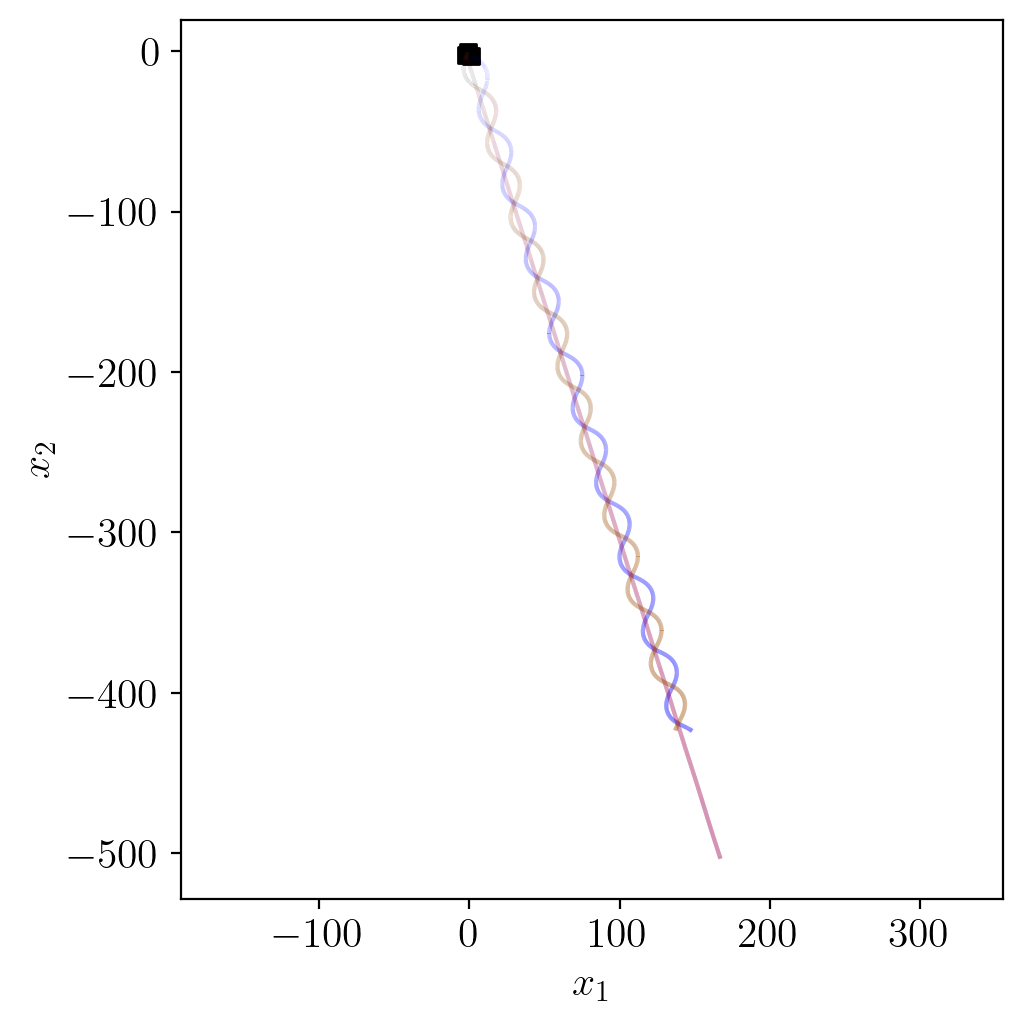

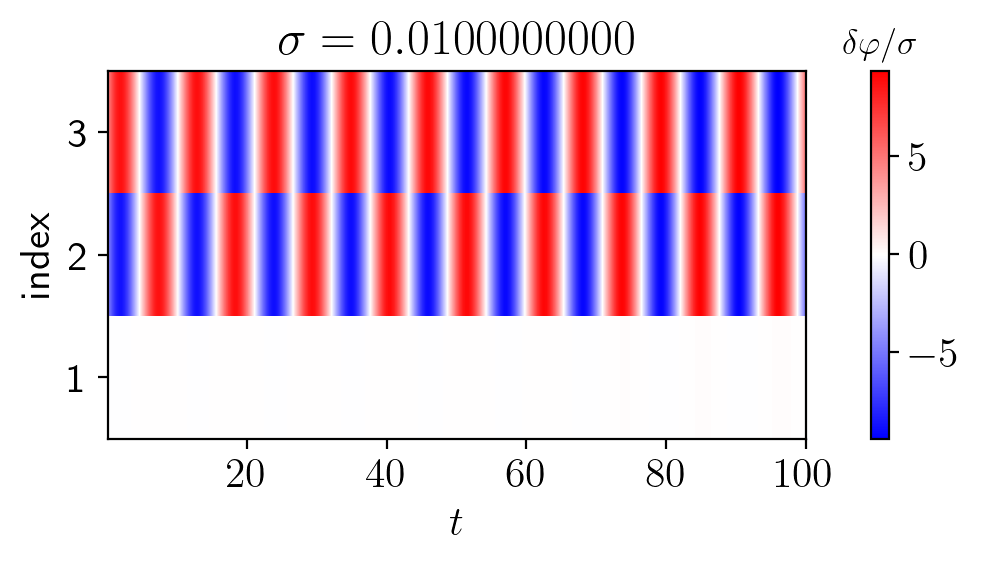

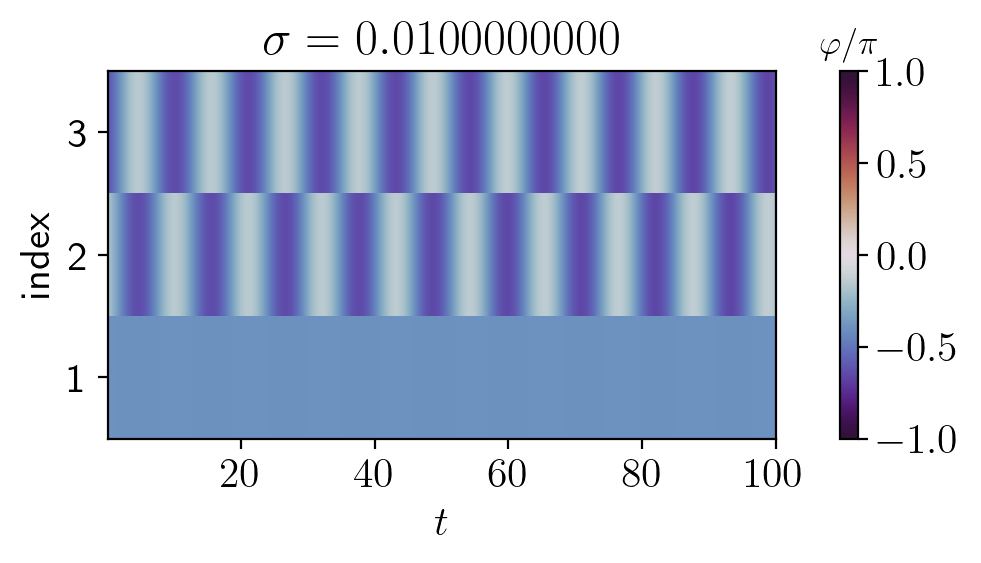

In [14]:
################################################################################3
prb1.pick_prepare()

# %matplotlib notebook
%matplotlib inline

figsize = np.array((16, 9)) * 0.3
dpi = 200 if 'inline' in matplotlib.get_backend() else 100
plt_tmin = prb1.t_hist.max() - 1000
markevery = 0.1
# 
resampling_fct, interp1d_kind = None, 'linear'
sps.show_fig_fun(prb1, sps.core_trajectory2D, figsize=None, dpi=dpi, 
                 plt_tmin=plt_tmin, resampling_fct=resampling_fct)
#
resampling_fct, interp1d_kind = 1, 'linear'
sps.show_fig_fun(prb1, sps.core_avrPhaseVelocity, figsize=figsize, dpi=dpi, 
                 plt_tmin=plt_tmin, resampling_fct=resampling_fct, npabs=False, 
                 tavr=None, vmin=None, vmax=None)

cmap = plt.get_cmap('twilight_shifted')
sps.show_fig_fun(prb1, sps.core_avrPhase, figsize=figsize, dpi=dpi, 
                 plt_tmin=plt_tmin, resampling_fct=resampling_fct, cmap=cmap, 
                 tavr=None, sort_type='normal')